In [33]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from keras.preprocessing.image import load_img

In [34]:
from tqdm import tqdm
import os

# Base directory of the dataset
BASE_DIR = "Dataset/UTKFace"

# Lists to store extracted data
image_paths = []
age_labels = []
gender_labels = []

# Process each file in the dataset
for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')  # Split filename into components
    age = int(temp[0])  # Extract age
    gender = int(temp[1])  # Extract gender
    image_paths.append(image_path)  # Add image path
    age_labels.append(age)  # Add age label
    gender_labels.append(gender)  # Add gender label

  0%|          | 0/23708 [00:00<?, ?it/s]

100%|██████████| 23708/23708 [00:00<00:00, 343052.46it/s]


In [35]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)


,image,age,gender
0,Dataset/UTKFace\100_0_0_20170112213500903.jpg....,100,0
1,Dataset/UTKFace\100_0_0_20170112215240346.jpg....,100,0
2,Dataset/UTKFace\100_1_0_20170110183726390.jpg....,100,1
3,Dataset/UTKFace\100_1_0_20170112213001988.jpg....,100,1
4,Dataset/UTKFace\100_1_0_20170112213303693.jpg....,100,1


In [36]:
df.tail(5)

,image,age,gender
23703,Dataset/UTKFace\9_1_3_20161220222856346.jpg.ch...,9,1
23704,Dataset/UTKFace\9_1_3_20170104222949455.jpg.ch...,9,1
23705,Dataset/UTKFace\9_1_4_20170103200637399.jpg.ch...,9,1
23706,Dataset/UTKFace\9_1_4_20170103200814791.jpg.ch...,9,1
23707,Dataset/UTKFace\9_1_4_20170103213057382.jpg.ch...,9,1


In [37]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

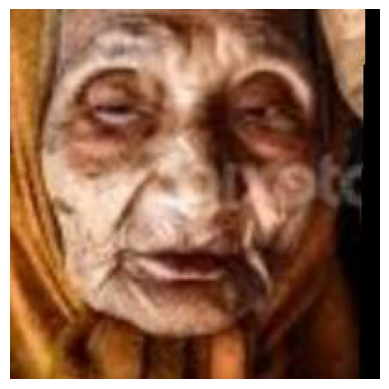

In [38]:
img = Image.open(df['image'][10])
plt.axis('off')
plt.imshow(img)

<Axes: xlabel='age', ylabel='Density'>

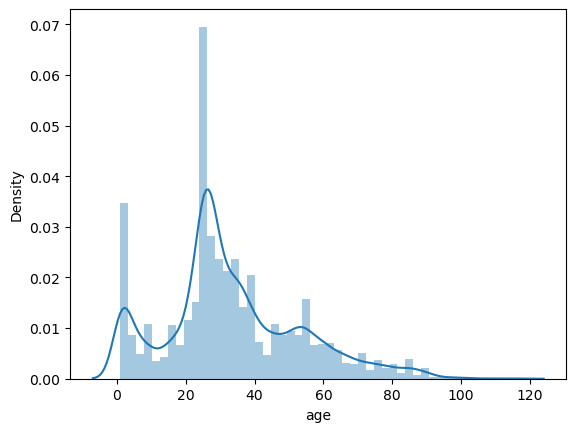

In [39]:
sns.distplot(df['age'])

<Axes: xlabel='gender', ylabel='count'>

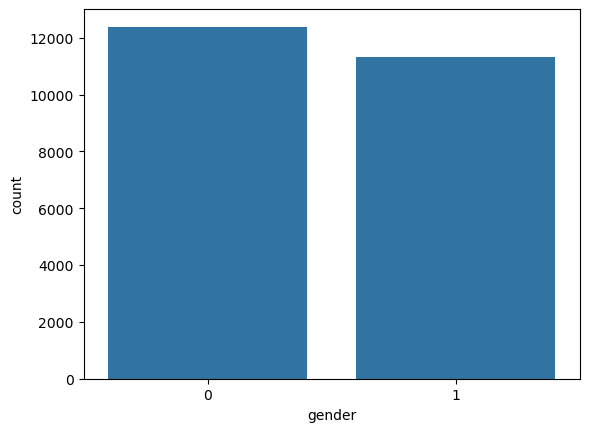

In [40]:
sns.countplot(x = df['gender'], data=df)


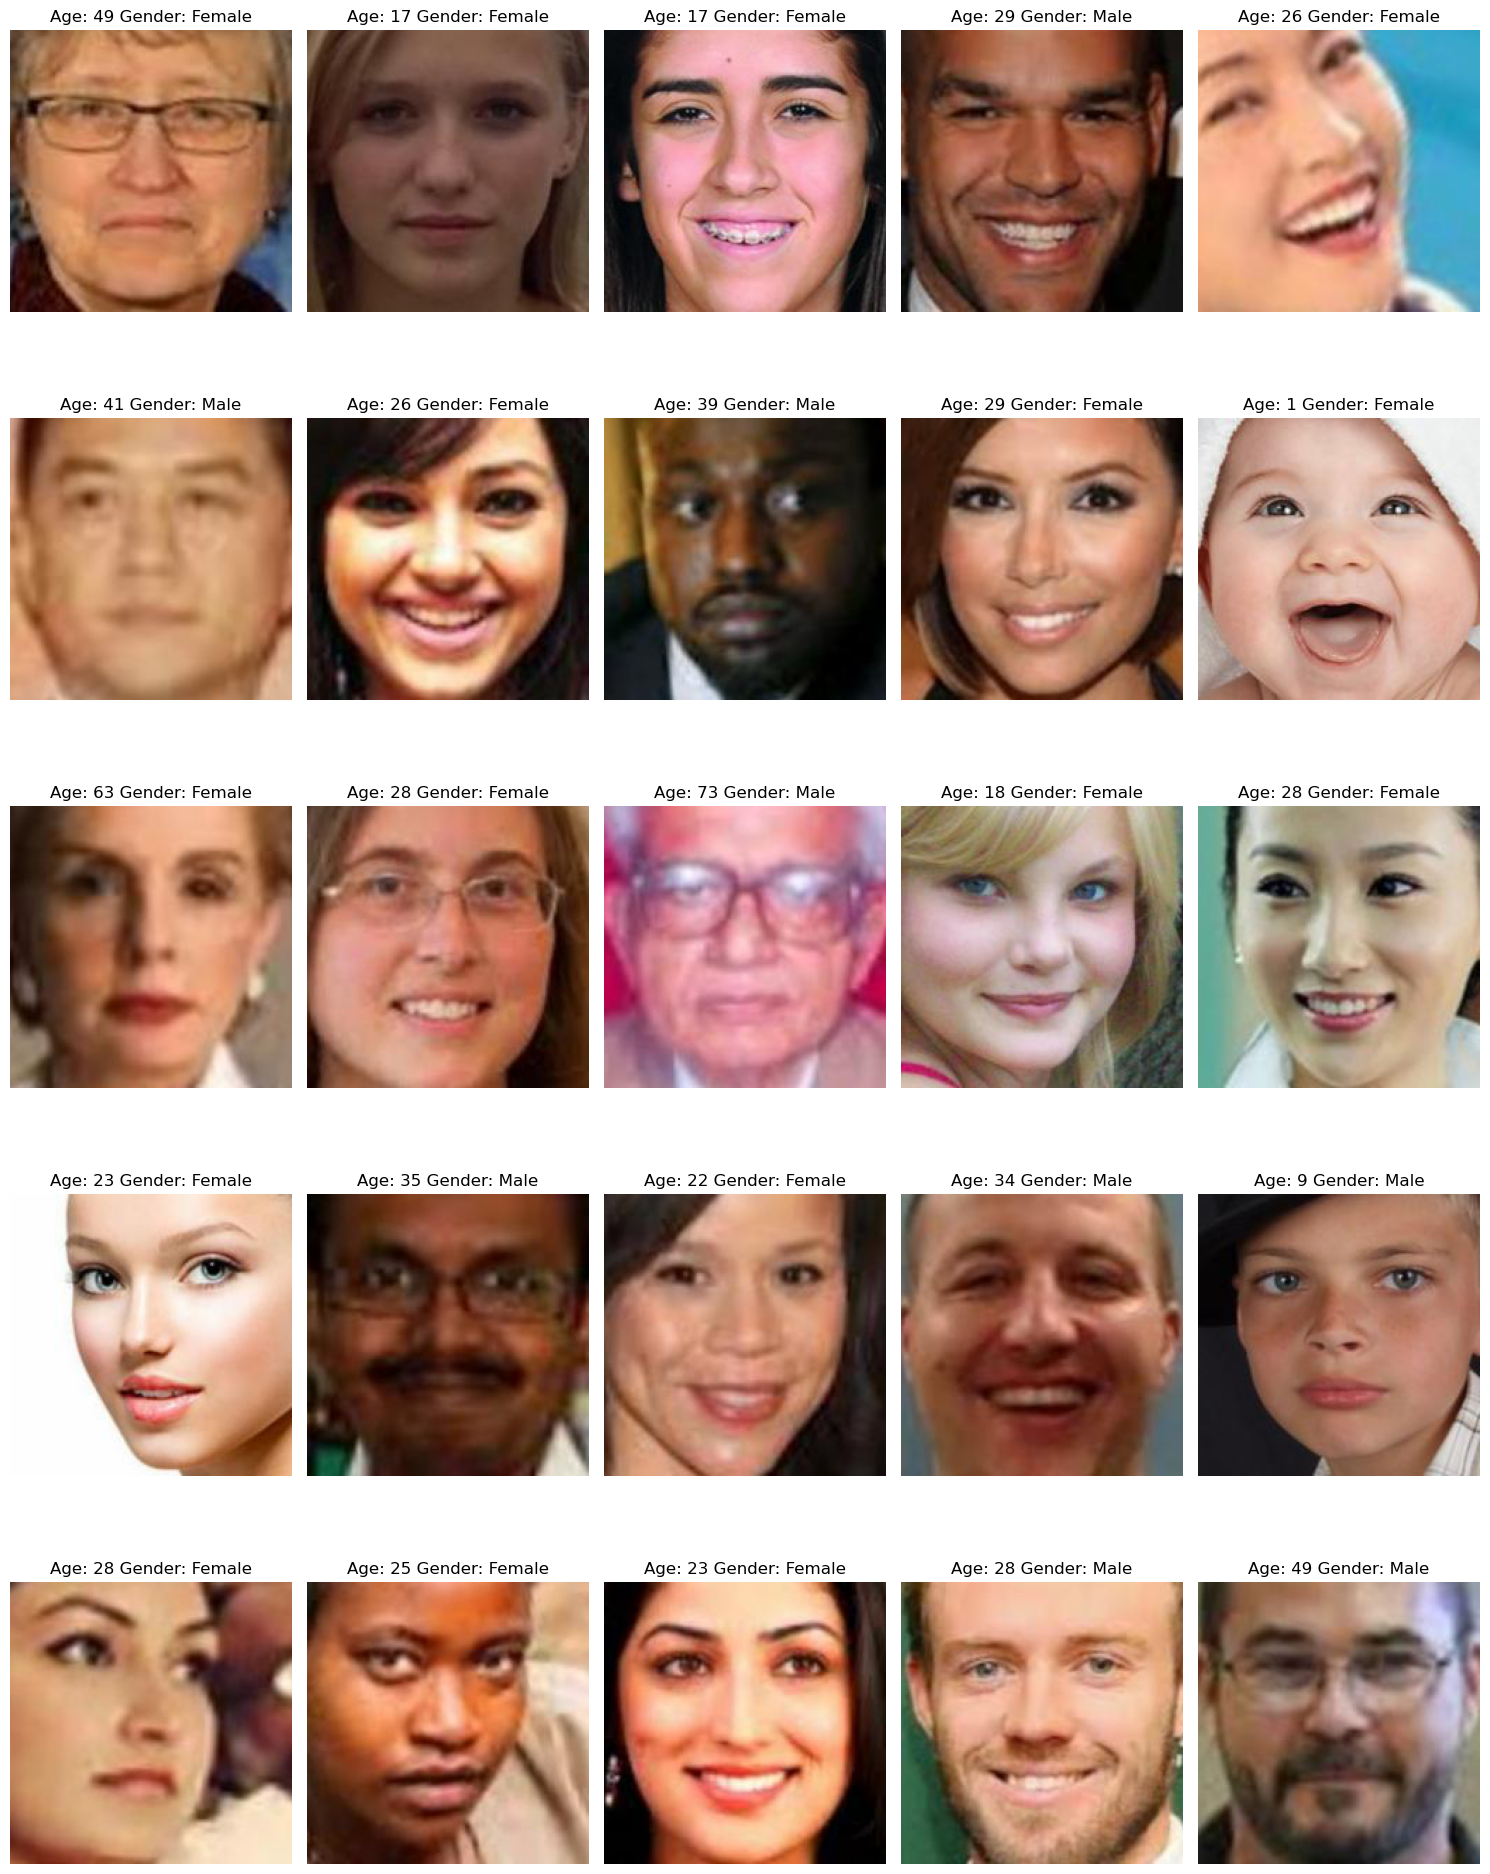

In [41]:
# Randomly sample 25 images for variety
sampled_df = df.sample(n=25, random_state=42)  # Set random_state for reproducibility

# Display images in a 5x5 grid
plt.figure(figsize=(15, 20))

for index, row in enumerate(sampled_df.itertuples()):
    # row is a namedtuple with index and the columns as fields
    file = row.image
    age = row.age
    genders = row.gender
    
    
    plt.subplot(5, 5, index + 1)
    img = load_img(file)  # Load image
    img = np.array(img)  # Convert to array for displaying
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[int(genders)]}")
    plt.axis('off')

plt.tight_layout()
plt.show()